In [1]:
import matplotlib.pyplot as plt
from seaborn import heatmap
from seaborn import pairplot
from besos import eppy_funcs as ef
from besos import sampling
from besos.evaluator import EvaluatorEP
from besos.parameters import RangeParameter, FieldSelector, FilterSelector, Parameter, expand_plist, wwr, CategoryParameter, GenericSelector
from besos.problem import EPProblem
import pandas as pd
import numpy as np

idf_3_optimum = "/home/ict4bd/Desktop/ict4building/DesignBuilderModel/3_layer_window_opt.idf"
building = ef.get_building(idf_3_optimum)
Materials = [material for material in building.idfobjects["MATERIAL"]]

In [2]:
Materials

[
 Material,
     Cast Concrete (Dense)_.1,    !- Name
     Rough,                    !- Roughness
     0.1,                      !- Thickness
     1.4,                      !- Conductivity
     2100,                     !- Density
     840,                      !- Specific Heat
     0.9,                      !- Thermal Absorptance
     0.6,                      !- Solar Absorptance
     0.6;                      !- Visible Absorptance,
 
 Material,
     Gypsum Plasterboard_.O25,    !- Name
     Rough,                    !- Roughness
     0.025,                    !- Thickness
     0.25,                     !- Conductivity
     900,                      !- Density
     1000,                     !- Specific Heat
     0.9,                      !- Thermal Absorptance
     0.5,                      !- Solar Absorptance
     0.5;                      !- Visible Absorptance,
 
 Material,
     Brickwork Outer_.1,       !- Name
     Rough,                    !- Roughness
     0.1,             

for window we are using the simplified version without considering the frame
u value is 1/termal resistance

U wall = 1/Rt = 1/(Rext+Rint+thickness_i/termal_conductivity_i)
U window = 1/(thickness_i/cond_glass_i + thickness_gas/cond_gas)

In [3]:
# fixed values
# heat transfer resistance external and internal
horizontal_Ext = 0.04 
horizontal_Int = 0.13
# we change only XPS Extruded Polystyrene  - CO2 Blowing_.4359
condutivity_XPS = 0.034

In [16]:
uValue_Wall_temp = []
for tick in np.linspace(0.01,0.5,25):      
    resistance = 0
    for i in Materials:
        if i.Name != "XPS Extruded Polystyrene  - CO2 Blowing_.4359":
            thickness_ = i.Thickness
            conductivity_ = i.Conductivity
            resistance += (thickness_/conductivity_)
    resistance += (tick/condutivity_XPS)
    U_val = (round(1/(horizontal_Ext + horizontal_Int + resistance),4))
    uValue_Wall_temp.append({'U-Value': U_val,
                             'Thickness': tick})
uValue_Wall = pd.DataFrame.from_dict(uValue_Wall_temp)
uValue_Wall

,U-Value,Thickness
0,1.0171,0.010000
1,0.6314,0.030417
2,0.4578,0.050833
3,0.3591,0.071250
4,0.2954,0.091667
5,0.2509,0.112083
6,0.2180,0.132500
7,0.1928,0.152917
8,0.1728,0.173333
9,0.1566,0.193750


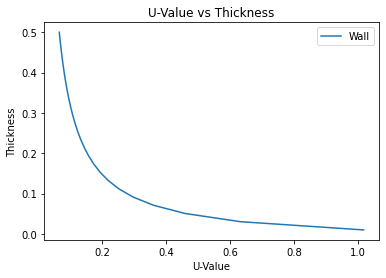

In [17]:
fig = plt.figure()
plt.plot(uValue_Wall['U-Value'],uValue_Wall['Thickness'],label='Wall')

plt.xlabel('U-Value')
plt.ylabel('Thickness')
plt.title('U-Value vs Thickness')
plt.legend()
plt.show()


In [ ]:
# Window u value are fixed and predefined in Design builder 
# 0.78 for 3 layer window
# 1.46 for 2 layer window 
# 2.91 for 1 layer window

# for the plots we can simulate 
# 0.0676 	0.479583 for high insulation
# 0.2509 	0.112083 medium insulation
# 1.0171 	0.010000 no insulation